In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load data
data = pd.read_csv('/Users/jahanavisingh/Downloads/archive/mnist_train.csv')

# Convert to numpy array
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # Shuffle before splitting

# Split into dev (validation) and training sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # Normalize pixel values to 0-1

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255. # Normalize pixel values
_, m_train = X_train.shape

In [5]:
#Initialization and Forward Propagation
def init_params():
    # W1: (10 hidden units, 784 inputs)
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    # W2: (10 output units, 10 hidden inputs)
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    # Subtract max for numerical stability (prevents overflow)
    expZ = np.exp(Z - np.max(Z)) 
    return expZ / sum(expZ)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [6]:
#Backpropagation and Updates
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    # Creates a matrix where the correct class is 1, others 0
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    
    # Calculate gradients
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [7]:
#Training Loop
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 50 == 0:
            print(f"Iteration: {i}")
            predictions = get_predictions(A2)
            print(f"Accuracy: {get_accuracy(predictions, Y)}")
            
    return W1, b1, W2, b2

Iteration: 0
[8 8 2 ... 8 4 4] [7 7 0 ... 0 8 4]
Accuracy: 0.1409491525423729
Iteration: 50
[7 8 0 ... 0 7 4] [7 7 0 ... 0 8 4]
Accuracy: 0.562271186440678
Iteration: 100
[7 8 0 ... 0 7 4] [7 7 0 ... 0 8 4]
Accuracy: 0.7112033898305085
Iteration: 150
[7 9 0 ... 0 7 4] [7 7 0 ... 0 8 4]
Accuracy: 0.7776101694915254
Iteration: 200
[7 9 0 ... 0 7 9] [7 7 0 ... 0 8 4]
Accuracy: 0.8084237288135593
Iteration: 250
[7 9 0 ... 0 7 9] [7 7 0 ... 0 8 4]
Accuracy: 0.827457627118644
Iteration: 300
[7 9 0 ... 0 7 9] [7 7 0 ... 0 8 4]
Accuracy: 0.8400338983050848
Iteration: 350
[7 9 0 ... 0 7 9] [7 7 0 ... 0 8 4]
Accuracy: 0.8492542372881355
Iteration: 400
[7 9 0 ... 0 0 9] [7 7 0 ... 0 8 4]
Accuracy: 0.8559830508474576
Iteration: 450
[7 9 0 ... 0 0 9] [7 7 0 ... 0 8 4]
Accuracy: 0.8624745762711864
Prediction:  [7]
Label:  7


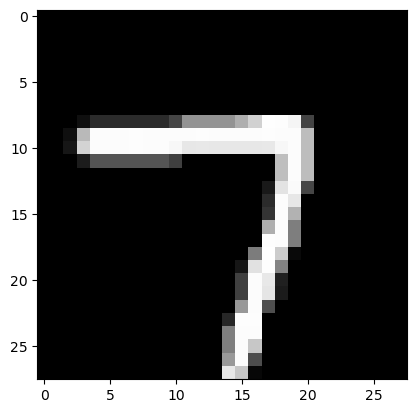

Prediction:  [7]
Label:  7


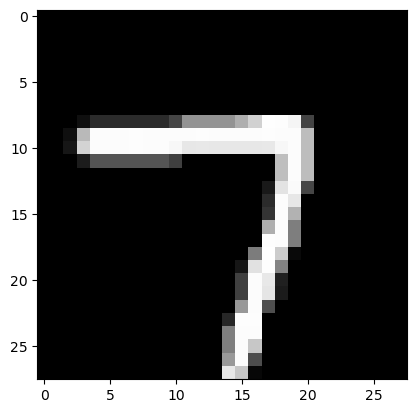

In [9]:
#Running the Model
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions
    
# Step 1: Train the model (this takes a moment to run)
# We capture the returned parameters into variables W1, b1, etc.
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

# Step 2: Make a prediction
# Now W1 exists in the global scope and can be passed to the function
test_prediction(0, W1, b1, W2, b2)
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Test a specific image
test_prediction(0, W1, b1, W2, b2)